# Linearna regresija - vježba
U ovoj Jupyter bilježnici bit će zadani zadatci na kojima će se testirati model linearne regresije

## Dijabetes - zadatak 1

U ovom zadatku primjeniti ćemo model linearne regresije na skup podataka o dijabetesu. Skup sadrži $442$ podatka. Svaki je podatak prikazan 10-dimenzionalnim vektorom značajki, a oznake su mjere stanja pacijenta nakon godinu dana od otkrivanja dijabetesa. Za početak ćemo učitati skup podataka, te se upoznati s značajkama s kojima radimo.


In [141]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [142]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

feature_names = diabetes.feature_names

print(feature_names)
print(diabetes.DESCR)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides lev

Za početak počnimo sa *baseline* modelom obične linearne regresije. On će nam služiti kao polazišna točka u odnosu na koju ćemo gledati uspjeh naprednijih modela.

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

model = LinearRegression()

model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

err_train = np.mean((y_train_predict - y_train) ** 2)
err_test = np.mean((y_test_predict - y_test) ** 2)

print(f'train error: {err_train}')
print(f'test error: {err_test}')



train error: 3006.248837223861
test error: 2319.9724640632544


Probajmo preslikati podatke polinomijalnim preslikavanjem

1
2
3


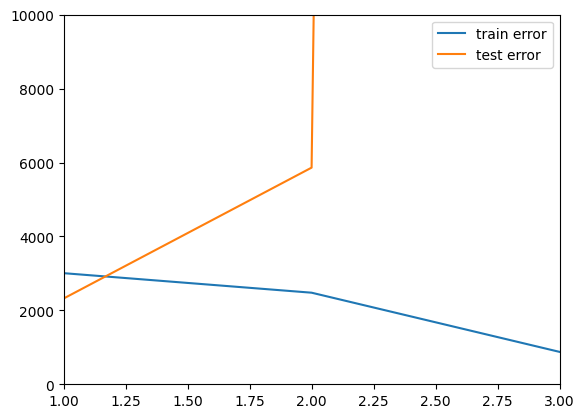

In [144]:
ds = [i for i in range(1, 4)]
errs_train = []
errs_test = []

for d in ds:
    print(d)
    poly = PolynomialFeatures(d, include_bias=False)

    x_train_trans = poly.fit_transform(x_train)
    x_test_trans = poly.fit_transform(x_test)

    model = LinearRegression()
    model.fit(x_train_trans, y_train)

    y_train_predict = model.predict(x_train_trans)
    y_test_predict = model.predict(x_test_trans)
    
    errs_train.append(
        np.mean((y_train_predict - y_train) ** 2)
    )
    errs_test.append(
        np.mean((y_test_predict - y_test) ** 2)
    )

plt.plot(
    ds,
    errs_train,
    label='train error'
)

plt.plot(
    ds,
    errs_test,
    label='test error'
)

plt.axis([ds[0],ds[-1], 0, 10000])

plt.legend()
plt.show()

Vidimo da povećanjem kapaciteta modela, testna greška strelovito raste dok se greška na skupu za učenje smanjuje. Model očigledno počinje učiti šum. Čak ni polinomijalno preslikavanje stupnja dva nije rezultiralo poboljšanjem modela. Na temelju toga možemo probati iskorsititi neki regularizirani model. Ideja je sljedeća, možda neke značajke ne pridonose regresiji, već su šum, koji se uči i koji samo "zbunjuje naš model".

In [148]:
model = Lasso(alpha=0.002)

model.fit(x_train, y_train)

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

err_train = np.mean((y_train_predict - y_train) ** 2)
err_test = np.mean((y_test_predict - y_test) ** 2)

print(f'train error: {err_train}')
print(f'test error: {err_test}')
print(model.coef_)

train error: 3006.7222232062736
test error: 2322.8983764701966
[ -22.31255164 -220.92880708  481.2868247   312.78482726 -615.00010326
  388.47341196  -11.79659622  109.78382119  719.13062435   92.44984958]


Vidimo da nažalost ni ova metoda nije puno, (a možda ni uopće unaprijedila naš model). Zato ćemo probati kombinirati ova dva pristupa. Napraviti ćemo polinomijalnu transformaciju stupnja 2, i primjeniti lasso regularizaciju.

In [146]:
model = Lasso(alpha=0.005)

poly = PolynomialFeatures(2, include_bias=False)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

model.fit(x_train_trans, y_train)

y_train_predict = model.predict(x_train_trans)
y_test_predict = model.predict(x_test_trans)

err_train = np.mean((y_train_predict - y_train) ** 2)
err_test = np.mean((y_test_predict - y_test) ** 2)

print(f'train error: {err_train}')
print(f'test error: {err_test}')

train error: 2780.0953552519754
test error: 2244.0185256698596


In [147]:
model = Ridge(alpha=0.002)

poly = PolynomialFeatures(2, include_bias=False)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

model.fit(x_train_trans, y_train)

y_train_predict = model.predict(x_train_trans)
y_test_predict = model.predict(x_test_trans)

err_train = np.mean((y_train_predict - y_train) ** 2)
err_test = np.mean((y_test_predict - y_test) ** 2)

print(f'train error: {err_train}')
print(f'test error: {err_test}')


train error: 2747.8694754937146
test error: 2223.596123423943


Vidimo da se regularizirani modeli u pravilu ponašaju malo bolje, to naravno ovisi o nasumičnoj raspodijeli na skup za učenje i skup za treniranje tako da je potrebno više puta pokrenuti model i uzeti prosječne vrijednosti prije donošenja čvrste odluke.